<a href="https://colab.research.google.com/github/rupalz/Covid-19/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams

from datetime import datetime

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe0f27a5590>],
      dtype=object)

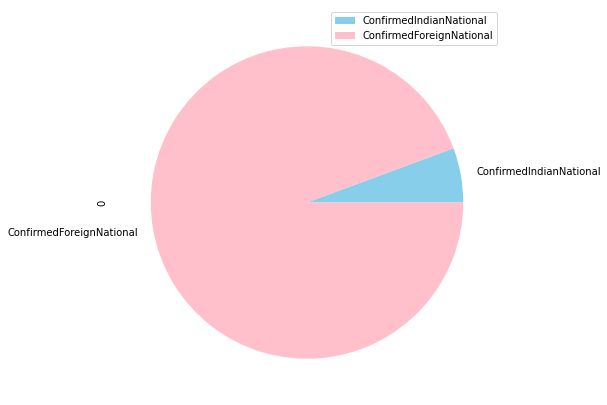

In [16]:
df = pd.DataFrame([11,184], index=['ConfirmedIndianNational', 'ConfirmedForeignNational'])
df.plot(kind='pie', subplots=True,colors=['skyblue','pink'], figsize=(7, 8))

In [24]:
covid_19=pd.read_csv('/content/covid_19_india.csv')
df3 = train.groupby('State/UnionTerritory')[['ConfirmedIndianNational', 'Confirmed']].sum().reset_index()
States = df3['State/UnionTerritory'].unique()
print(f'{len(States)} States are in dataset:\n{States}')

39 States are in dataset:
['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Cases being reassigned to states' 'Chandigarh'
 'Chhattisgarh' 'Dadra and Nagar Haveli and Daman and Diu' 'Daman & Diu'
 'Delhi' 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir'
 'Jharkhand' 'Karnataka' 'Kerala' 'Ladakh' 'Lakshadweep' 'Madhya Pradesh'
 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha'
 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telengana'
 'Tripura' 'Unassigned' 'Uttar Pradesh' 'Uttarakhand' 'West Bengal']


In [26]:
dfc = covid_19.groupby(['Date', 'State/UnionTerritory'])[['ConfirmedIndianNational', 'Confirmed']].sum().reset_index()
today = dfc['Date'].max()
print('Date: ', today)
for i in [1, 10, 100, 1000, 10000]:
    n_States = len(dfc.query('(Date == @today) & Confirmed > @i'))
    print(f'{n_States} States have more than {i} Confirmed')

Date:  2021-04-28
36 States have more than 1 Confirmed
36 States have more than 10 Confirmed
36 States have more than 100 Confirmed
36 States have more than 1000 Confirmed
31 States have more than 10000 Confirmed


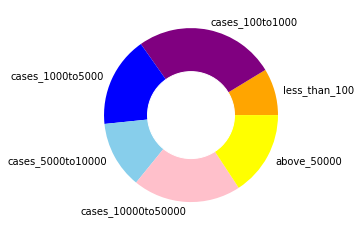

In [27]:
top_States = covid_19.groupby('State/UnionTerritory')[['Confirmed']].sum().reset_index()
less_than_100 = len(top_States.query('(Confirmed<=100)'))
cases_100to1000 = len(top_States.query('(Confirmed>=100) & (Confirmed <=1000)'))
cases_1000to5000=len(top_States.query('(Confirmed>=1000) & (Confirmed <=5000)'))
cases_5000to10000=len(top_States.query('(Confirmed>=5000) & (Confirmed <=10000)'))
cases_10000to50000=len(top_States.query('(Confirmed>=10000) & (Confirmed <=50000)'))
above_50000=len(top_States.query('(Confirmed>=50000)'))
names='less_than_100', 'cases_100to1000', 'cases_1000to5000', 'cases_5000to10000','cases_10000to50000','above_50000'
size=[16,48,31,23,37,29]
my_circle=plt.Circle( (0,0), 0.5, color='white')

plt.pie(size, labels=names, colors=['orange','purple','blue','skyblue','pink','yellow'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [34]:
top_States_df = dfc.query('(Date == @today) & (Confirmed > 1000)').sort_values('Confirmed', ascending=False)

top_States_melt_df = pd.melt(top_States_df, id_vars='State/UnionTerritory', value_vars='Confirmed')

fig = px.bar(top_States_melt_df, x="State/UnionTerritory", y="value", color='variable',
              title=f'Confirmed as on {today}')
fig.show()

In [35]:
top10_States = top_States.sort_values('Confirmed', ascending=False).iloc[:10]['State/UnionTerritory'].unique()
top10_States_df = dfc[dfc['State/UnionTerritory'].isin(top10_States)]
fig = px.line(top10_States_df,
              x='Date', y='Confirmed', color='State/UnionTerritory',
              title=f'Confirmed for top 10 States as on {today}')
fig.show()